# Analysis and insights Python script: Solar power plant generation analysis
## Part 3: Analysis and insights

## Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:15.2f}'.format
sns.set_style("darkgrid")

## Load data

In [4]:
df = pd.read_pickle("data/df.pickle")
df.head()

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
timestamp,,,,,,,,,,,,,,,
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00


In [5]:
df_daily = pd.read_pickle("data/df_daily.pickle")
df_daily.head()

,plant,inverter_id,irradiance_min,irradiance_mean,irradiance_max,t_ambient_min,t_ambient_mean,t_ambient_max,t_module_min,t_module_mean,...,kw_dc_sum,kw_ac_min,kw_ac_mean,kw_ac_max,kw_ac_sum,efficiency_min,efficiency_mean,efficiency_max,kw_day_max,kw_total_max
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-15,p1,1BY6WEcLGh8j5v7,0.00,0.20,0.89,22.04,27.43,34.43,20.29,32.58,...,235340.70,0.00,247.81,1039.35,23046.55,0.00,5.26,9.82,5754.00,6265313.00
2020-05-16,p1,1BY6WEcLGh8j5v7,0.00,0.21,0.81,21.50,26.78,32.52,19.59,31.86,...,256629.88,0.00,285.51,1095.29,25124.49,0.00,5.56,9.83,6292.00,6271605.00
2020-05-17,p1,1BY6WEcLGh8j5v7,0.00,0.24,1.00,21.21,26.69,35.25,20.38,32.74,...,288039.82,0.00,293.47,1114.81,28172.85,0.00,4.99,9.82,7045.00,6278650.00
2020-05-18,p1,1BY6WEcLGh8j5v7,0.00,0.16,0.97,20.96,23.85,28.37,19.48,27.81,...,204030.30,0.00,208.03,1193.63,19970.51,0.00,4.99,9.83,4998.00,6283648.00
2020-05-19,p1,1BY6WEcLGh8j5v7,0.00,0.19,0.84,22.39,25.34,30.37,20.06,29.73,...,232277.27,0.00,244.53,1059.80,22741.18,0.00,4.63,9.83,6449.00,6290097.00


## Analysis and insights

The first lever is the irradiance and the panel status.

We have 3 kpis that measure them, which are: irradiance and ambient and module temperature. These kpis are measured with a single sensor in each plant. The data are the same for all the inverters. Then, we are going to **create a smaller dataframe** with only one inverter from each plant and the 3 variables we just mentioned.

After that we will proceed to analyse how these variables interact with the other ones, but first we need to understand them at a lower level.

In [6]:
df

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total
timestamp,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00


In [7]:
reception = df[(df["inverter_id"] == "1BY6WEcLGh8j5v7") | (df["inverter_id"] == "q49J1IKaHRwDQnt")].loc[:,"plant":"t_module"]
reception

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module
timestamp,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86
2020-05-15 00:15:00,p1,5,15,0,15,HmiyD2TTLFNqkNe,0.00,25.08,22.76
2020-05-15 00:30:00,p1,5,15,0,30,HmiyD2TTLFNqkNe,0.00,24.94,22.59
2020-05-15 00:45:00,p1,5,15,0,45,HmiyD2TTLFNqkNe,0.00,24.85,22.36
2020-05-15 01:00:00,p1,5,15,1,0,HmiyD2TTLFNqkNe,0.00,24.62,22.17
...,...,...,...,...,...,...,...,...,...
2020-06-17 22:45:00,p2,6,17,22,45,iq8k7ZNt4Mwm3w0,0.00,23.51,22.86
2020-06-17 23:00:00,p2,6,17,23,0,iq8k7ZNt4Mwm3w0,0.00,23.48,22.74
2020-06-17 23:15:00,p2,6,17,23,15,iq8k7ZNt4Mwm3w0,0.00,23.35,22.49


### Do both power plants receive the same solar energy?

In [8]:
temp = reception.groupby("plant").agg({"irradiance":sum,"t_ambient":np.mean,"t_module":np.mean})
temp

,irradiance,t_ambient,t_module
plant,,,
p1,726.40,25.56,31.18
p2,758.49,28.07,32.77


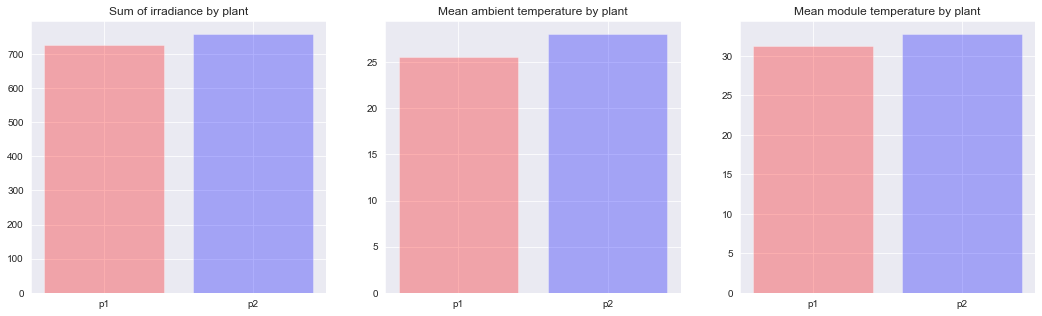

In [9]:
f,ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

ax[0].bar(temp.index, temp["irradiance"], color = ["red","blue"], alpha = 0.3)
ax[1].bar(temp.index, temp["t_ambient"], color = ["red","blue"], alpha = 0.3)
ax[2].bar(temp.index, temp["t_module"], color = ["red","blue"], alpha = 0.3)
ax[0].set_title("Sum of irradiance by plant")
ax[1].set_title("Mean ambient temperature by plant")
ax[2].set_title("Mean module temperature by plant");

Conclusions:

- Plant 2 receives more irradiance than plant 1.
- This difference is too low to explain the performance drop between both plants.

### How are these three variables related?

In [10]:
temp = reception.loc[:,["plant","irradiance","t_ambient","t_module"]]
temp

,plant,irradiance,t_ambient,t_module
timestamp,,,,
2020-05-15 00:00:00,p1,0.00,25.18,22.86
2020-05-15 00:15:00,p1,0.00,25.08,22.76
2020-05-15 00:30:00,p1,0.00,24.94,22.59
2020-05-15 00:45:00,p1,0.00,24.85,22.36
2020-05-15 01:00:00,p1,0.00,24.62,22.17
...,...,...,...,...
2020-06-17 22:45:00,p2,0.00,23.51,22.86
2020-06-17 23:00:00,p2,0.00,23.48,22.74
2020-06-17 23:15:00,p2,0.00,23.35,22.49


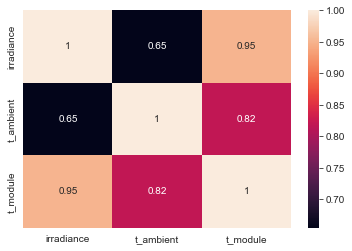

In [11]:
sns.heatmap(temp.corr(), annot=True);

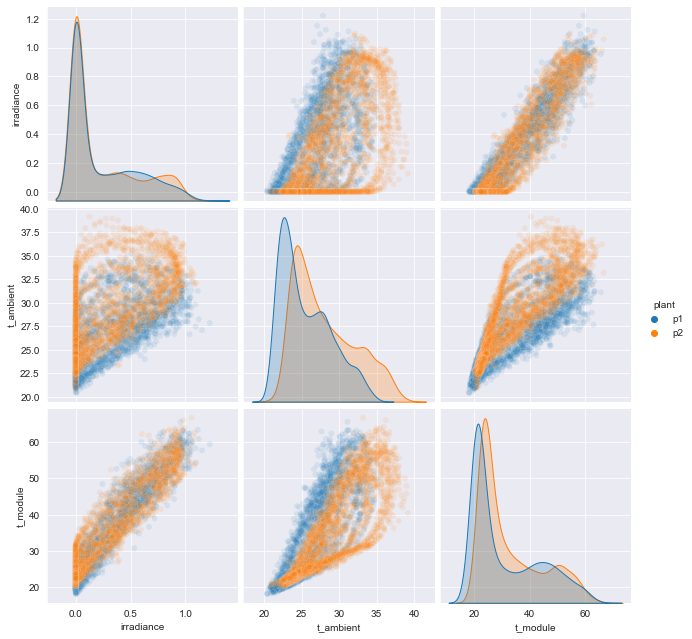

In [12]:
sns.pairplot(data=temp.reset_index(), hue="plant", height=3, plot_kws={"alpha":0.1});

Conclusions:

- Irradiance is highly related with the temperature of the module but not much with ambient temperature
- Then a way of identifying defective modules is by looking at those with low DC production at high irradiance values.

### What is the hourly distribution of irradiance and temperature by plant throughout the day?

In [13]:
temp = pd.crosstab(index = reception["hour"],columns = reception["plant"], values=reception["irradiance"], aggfunc="mean")
temp

plant,p1,p2
hour,,
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.04,0.04
7,0.19,0.19
8,0.37,0.39


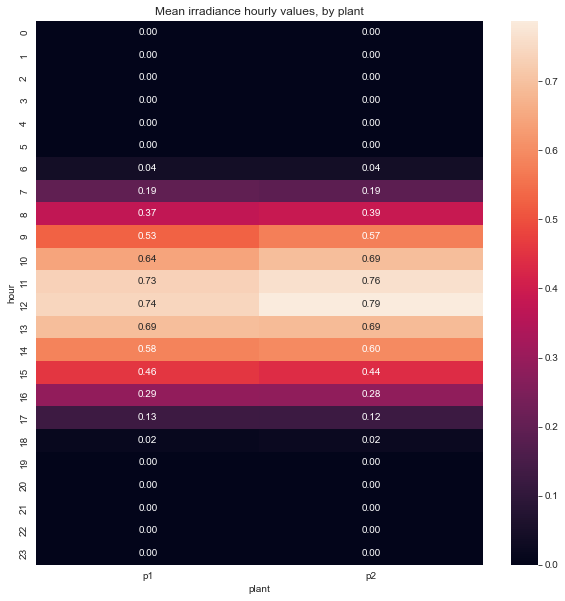

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f")
plt.title("Mean irradiance hourly values, by plant");

In [15]:
temp = pd.crosstab(index = reception["hour"],columns = reception["plant"], values=reception["t_ambient"], aggfunc="mean")
temp

plant,p1,p2
hour,,
0,22.80,25.20
1,22.63,24.82
2,22.46,24.48
3,22.32,24.27
4,22.17,24.07
5,22.06,23.91
6,22.20,24.19
7,23.34,25.48
8,24.92,27.05


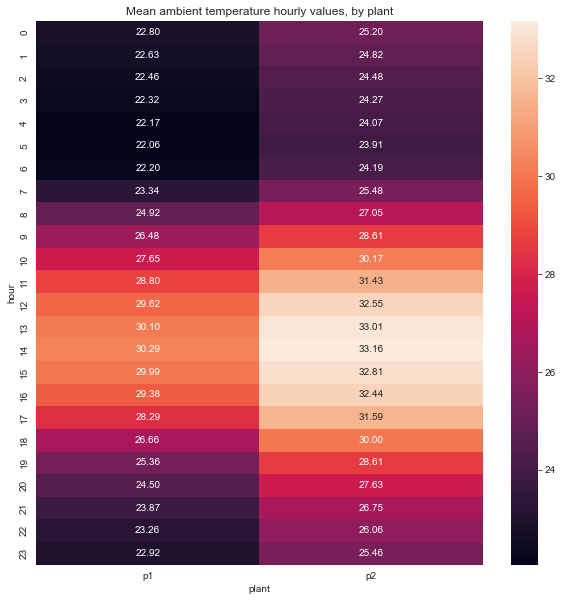

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f")
plt.title("Mean ambient temperature hourly values, by plant");

In [17]:
temp = pd.crosstab(index = reception["hour"],columns = reception["plant"], values=reception["t_module"], aggfunc="mean")
temp

plant,p1,p2
hour,,
0,20.99,23.88
1,20.87,23.52
2,20.77,23.22
3,20.62,23.01
4,20.47,22.81
5,20.35,22.68
6,21.29,23.76
7,26.91,28.58
8,35.50,35.19


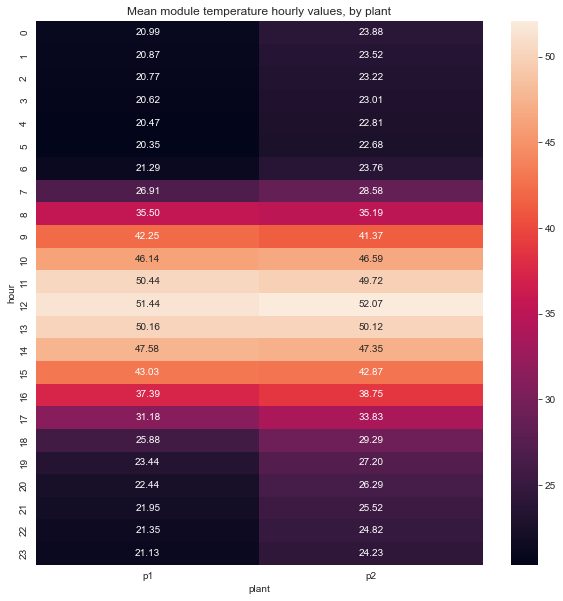

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f")
plt.title("Mean module temperature hourly values, by plant");

Conclusions:

- Both power plants share similar patterns. Probably both plants are in the same geographic zones.
- There's irradiance between 7 and 17, so there should be energy production between these hours.
- Maximum irradiance takes place between 11 and 12.
- Maximum ambient temperature takes place between 14 and 16.
- Maximum module temperature matches the time for maximum irradiance.

### Can both plants generate the same amount of DC using the same irradiance?

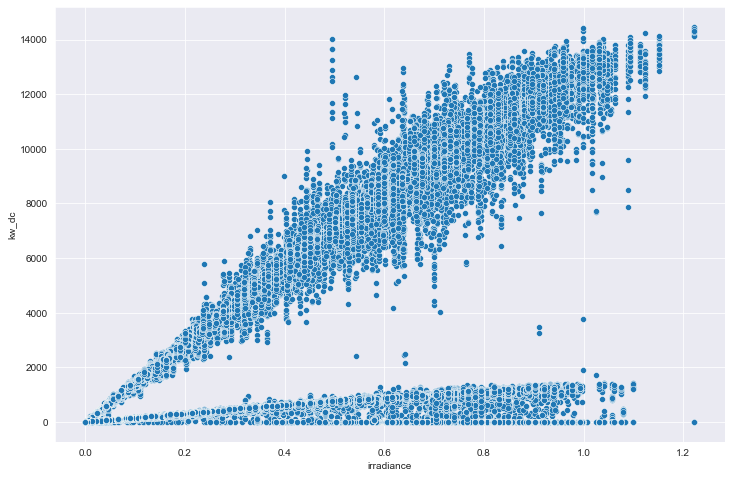

In [19]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df["irradiance"], y = df["kw_dc"]);

Apparently there are 2 patterns in the previous figure. 

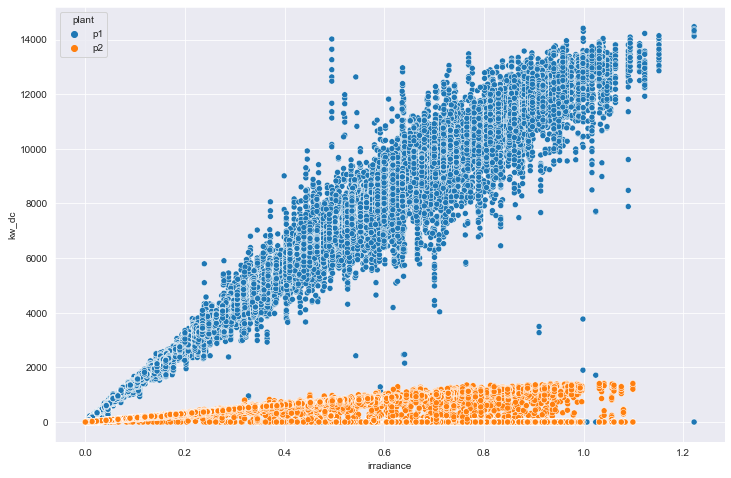

In [20]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df["irradiance"], y = df["kw_dc"], hue="plant");

Clearly plant 2 produces less kW with the same irradiance.

But at the beginning during the quality check we saw that the conversion from DC to AC in plant 1 was very low, around 10%. Also, there was no relationship between the DC and AC values with the daily produced kW (kw_day).

There is something strange with the data. Let's see if we can grasp something by plotting irradiance and kw_day.

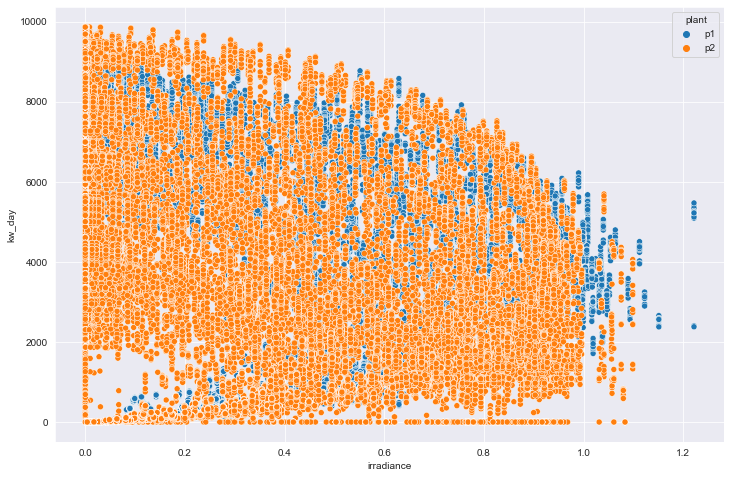

In [21]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df["irradiance"], y = df["kw_day"], hue="plant");

According to the previous scatterplot, the maximum daily kW accumulation takes place with 0 irradiance. And the more irradiance, the less power is "accumulated". 

This is very strange. Maybe it's a good idea to see if kw_day is working correctly, because it is an accumulation variable, meaning that the maximum value should occur at the last timestamp of a given day (23:45). And we should have 0 kW produced until 7am.

Let's check that.

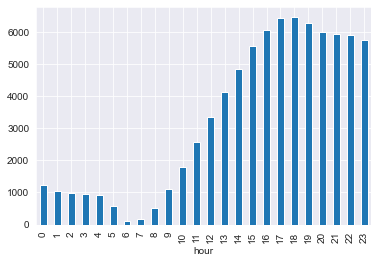

In [22]:
df.groupby("hour")["kw_day"].mean().plot.bar();

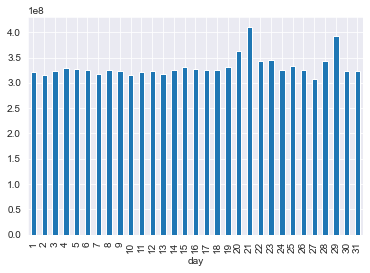

In [23]:
df.groupby("day")["kw_total"].mean().plot.bar();

Well, that does not make any sense. This is not the trend we would expect in this case.

Conclusion:

- We do not trust kw_day and kw_total variables.

### In this case we would need to talk to the business owners to know more about the situation with the data before proceeding with further analyses.

In this case we are going to assume that the DC and AC data are correct.

**INSIGHT #1**

Plant 2 produces way lower DC power at similar irradiance levels.

### Is the power generation constant throughout the days?

Here we can use df_daily to plot this.

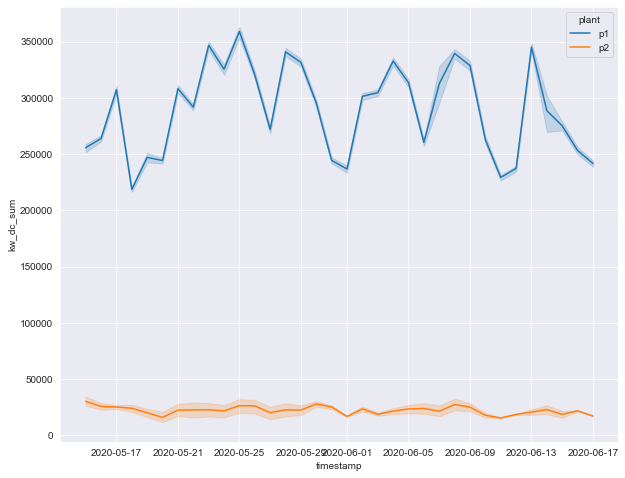

In [24]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_daily.reset_index(), x=df_daily.index, y=df_daily.reset_index()["kw_dc_sum"], hue="plant");

Plant 1 shows higher DC power generation variation than plant 2, which looks smoother.

We also see the low DC levels for plant 2 compared to plant 1, as we saw in previous plots.

Let's check how the generation varies daily.

Let's create a date variable to aggregate by it.

In [32]:
df["date"] = df.index.date
df

,plant,month,day,hour,minute,sensor_id,irradiance,t_ambient,t_module,inverter_id,kw_dc,kw_ac,efficiency,kw_day,kw_total,date
timestamp,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,6259559.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,6183645.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,6987759.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,7602960.00,2020-05-15
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,7158964.00,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,4157.00,520758.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,3931.00,121131356.00,2020-06-17
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,4322.00,2427691.00,2020-06-17


We can create a temporal dataframe with the hourly DC generation for each day in plant 1.

In [35]:
dc_constant_p1 = df[df["plant"] == "p1"].groupby(["plant","date","hour"])["kw_dc"].sum()
dc_constant_p1

plant  date        hour
p1     2020-05-15  0                 0.00
                   1                 0.00
                   2                 0.00
                   3                 0.00
                   4                 0.00
                                ...      
       2020-06-17  19                0.00
                   20                0.00
                   21                0.00
                   22                0.00
                   23                0.00
Name: kw_dc, Length: 796, dtype: float64

We are going to remove the multi index by sending the date variable as columns with unstack method.

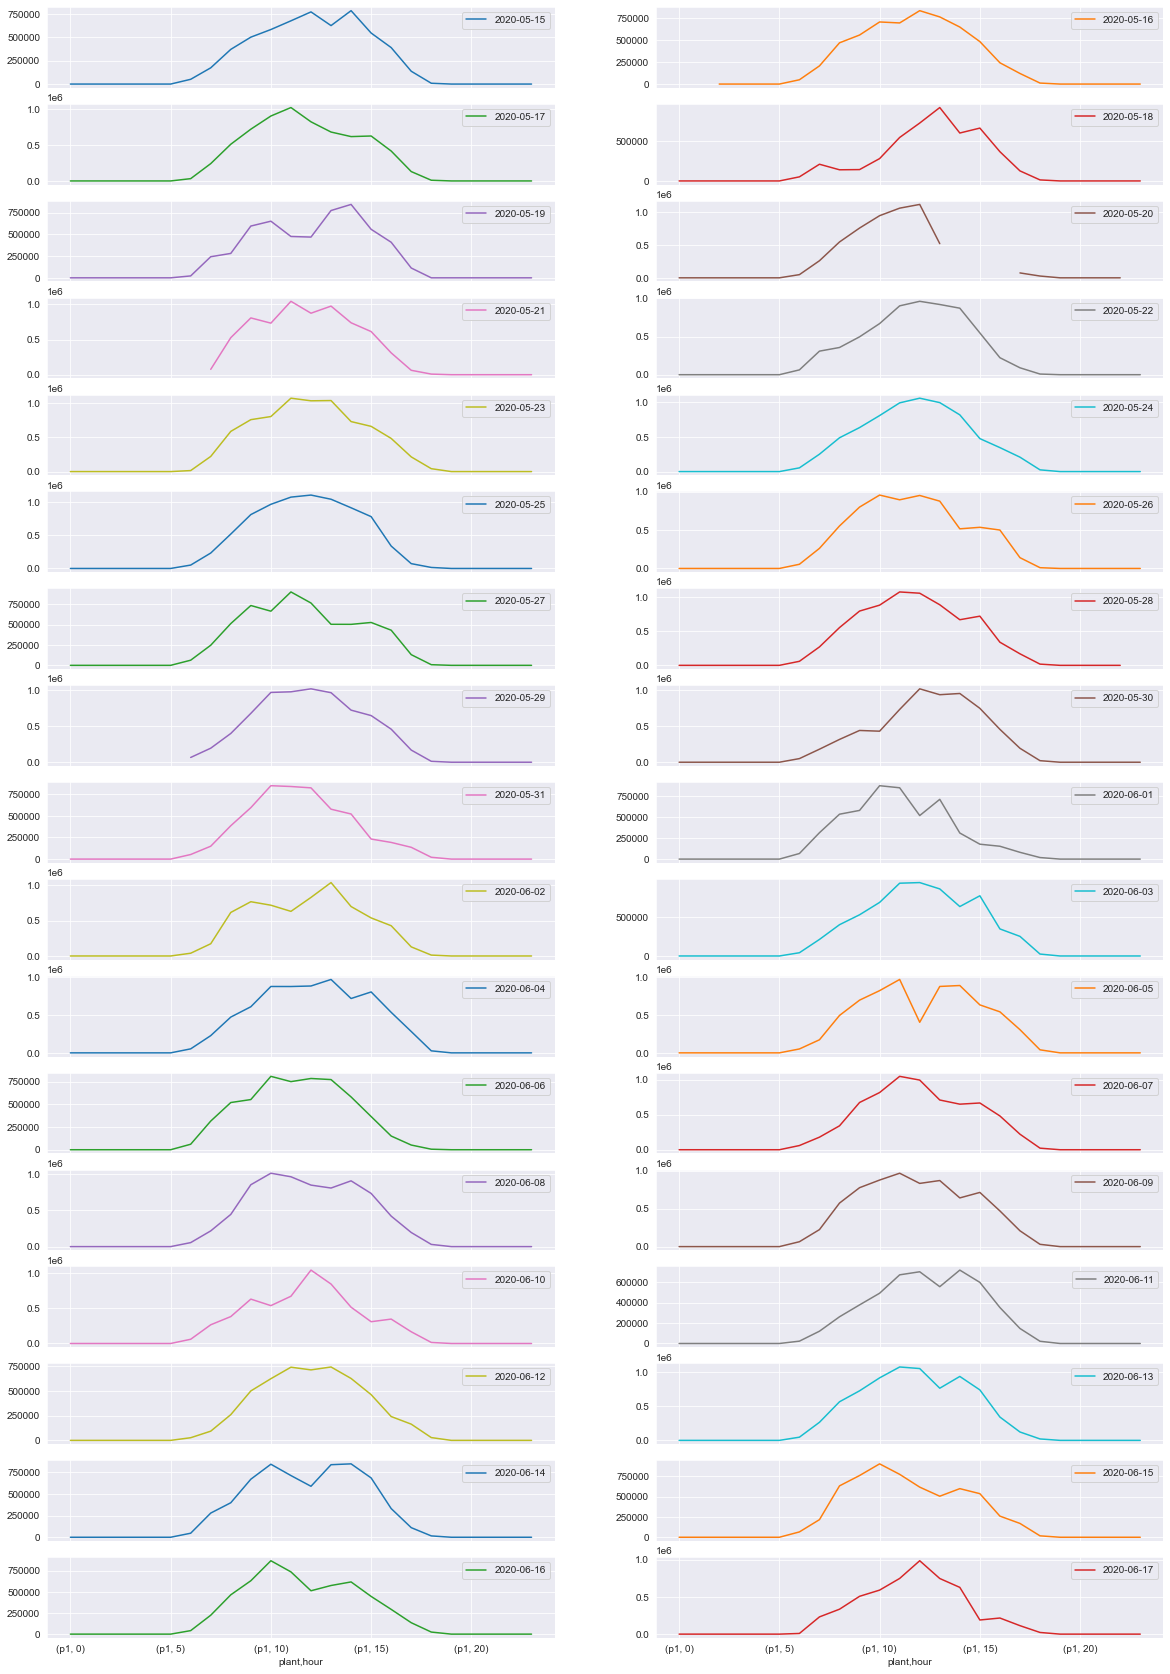

In [37]:
dc_constant_p1.unstack(level=1).plot(subplots=True, layout=(17,2), sharex=True, figsize=(20,30));